In [1]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import time
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, precision_recall_curve
# import warnings
# warnings.filterwarnings("ignore")

In [2]:
# %pip install tensorflow

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import time
import multiprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
# import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import confusion_matrix, r2_score, mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, precision_recall_curve
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('Train_Data.csv')

In [5]:
df['wrongfragment'].describe()

count    86845.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: wrongfragment, dtype: float64

In [6]:
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,attack
0,0,tcp,netbios_dgm,REJ,0,0,0,0,0,0,...,0.06,0.06,0.00,0.00,0.00,0.0,1.00,1.0,21,neptune
1,0,tcp,smtp,SF,1239,400,0,0,0,0,...,0.45,0.04,0.00,0.00,0.11,0.0,0.02,0.0,18,normal
2,0,tcp,http,SF,222,945,0,0,0,0,...,1.00,0.00,0.02,0.03,0.00,0.0,0.00,0.0,21,normal
3,0,tcp,http,SF,235,1380,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,21,normal
4,0,tcp,uucp_path,REJ,0,0,0,0,0,0,...,0.01,0.08,0.00,0.00,0.00,0.0,1.00,1.0,19,neptune


In [7]:
df.shape

(86845, 43)

In [8]:
df.describe()

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag
count,86845.000000,8.684500e+04,8.684500e+04,86845.000000,86845.0,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,...,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000
mean,104.166872,8.455707e+03,2.732095e+03,0.000046,0.0,0.000035,0.144971,0.000771,0.441142,0.320583,...,123.338269,0.526457,0.050186,0.075810,0.016246,0.324666,0.318934,0.092391,0.091045,20.060522
std,1038.273538,3.582141e+05,5.543041e+04,0.006787,0.0,0.007588,1.837958,0.037009,0.496527,27.993474,...,112.704010,0.447353,0.103323,0.208388,0.055271,0.464291,0.463506,0.282768,0.281452,1.421425
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,12.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000
50%,0.000000,4.600000e+01,4.400000e+01,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,77.000000,0.550000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
75%,0.000000,2.720000e+02,7.680000e+02,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.020000,0.010000,1.000000,1.000000,0.000000,0.000000,21.000000
max,40504.000000,8.958152e+07,7.028652e+06,1.000000,0.0,2.000000,77.000000,4.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [9]:
df.isnull().sum()

duration                  0
protocoltype              0
service                   0
flag                      0
srcbytes                  0
dstbytes                  0
land                      0
wrongfragment             0
urgent                    0
hot                       0
numfailedlogins           0
loggedin                  0
numcompromised            0
rootshell                 0
suattempted               0
numroot                   0
numfilecreations          0
numshells                 0
numaccessfiles            0
numoutboundcmds           0
ishostlogin               0
isguestlogin              0
count                     0
srvcount                  0
serrorrate                0
srvserrorrate             0
rerrorrate                0
srvrerrorrate             0
samesrvrate               0
diffsrvrate               0
srvdiffhostrate           0
dsthostcount              0
dsthostsrvcount           0
dsthostsamesrvrate        0
dsthostdiffsrvrate        0
dsthostsamesrcportra

In [10]:
df = df.drop(['land', 'urgent', 'numoutboundcmds' ,'numfailedlogins'], axis=1)

In [11]:
df.shape

(86845, 39)

In [12]:
df.describe()

,duration,srcbytes,dstbytes,wrongfragment,hot,loggedin,numcompromised,rootshell,suattempted,numroot,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag
count,86845.000000,8.684500e+04,8.684500e+04,86845.0,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,...,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000
mean,104.166872,8.455707e+03,2.732095e+03,0.0,0.144971,0.441142,0.320583,0.001347,0.001267,0.356382,...,123.338269,0.526457,0.050186,0.075810,0.016246,0.324666,0.318934,0.092391,0.091045,20.060522
std,1038.273538,3.582141e+05,5.543041e+04,0.0,1.837958,0.496527,27.993474,0.036680,0.048450,28.415210,...,112.704010,0.447353,0.103323,0.208388,0.055271,0.464291,0.463506,0.282768,0.281452,1.421425
min,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,12.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000
50%,0.000000,4.600000e+01,4.400000e+01,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,77.000000,0.550000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
75%,0.000000,2.720000e+02,7.680000e+02,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,1.000000,0.070000,0.020000,0.010000,1.000000,1.000000,0.000000,0.000000,21.000000
max,40504.000000,8.958152e+07,7.028652e+06,0.0,77.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [13]:
df.dtypes

duration                    int64
protocoltype               object
service                    object
flag                       object
srcbytes                    int64
dstbytes                    int64
wrongfragment               int64
hot                         int64
loggedin                    int64
numcompromised              int64
rootshell                   int64
suattempted                 int64
numroot                     int64
numfilecreations            int64
numshells                   int64
numaccessfiles              int64
ishostlogin                 int64
isguestlogin                int64
count                       int64
srvcount                    int64
serrorrate                float64
srvserrorrate             float64
rerrorrate                float64
srvrerrorrate             float64
samesrvrate               float64
diffsrvrate               float64
srvdiffhostrate           float64
dsthostcount                int64
dsthostsrvcount             int64
dsthostsamesrv

In [14]:
df.select_dtypes(exclude=[np.number])

,protocoltype,service,flag,attack
0,tcp,netbios_dgm,REJ,neptune
1,tcp,smtp,SF,normal
2,tcp,http,SF,normal
3,tcp,http,SF,normal
4,tcp,uucp_path,REJ,neptune
...,...,...,...,...
86840,tcp,http,SF,normal
86841,tcp,http,SF,normal
86842,tcp,ftp,SF,normal
86843,tcp,smtp,SF,normal


In [15]:
df['protocoltype'].unique()
# df['service'].unique()
# df['flag'].unique()
# df['attack'].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [16]:
#Applying Label Encoder in these:
le = LabelEncoder()

In [17]:
df['protocoltype']=le.fit_transform(df['protocoltype'])
df['service']=le.fit_transform(df['service'])
df['flag']=le.fit_transform(df['flag'])
df['attack']=le.fit_transform(df['attack'])

In [26]:
X= df.drop(['attack'], axis=1)
y = df['attack']
y

0        0
1        1
2        1
3        1
4        0
        ..
86840    1
86841    1
86842    1
86843    1
86844    1
Name: attack, Length: 86845, dtype: int32

<Axes: >

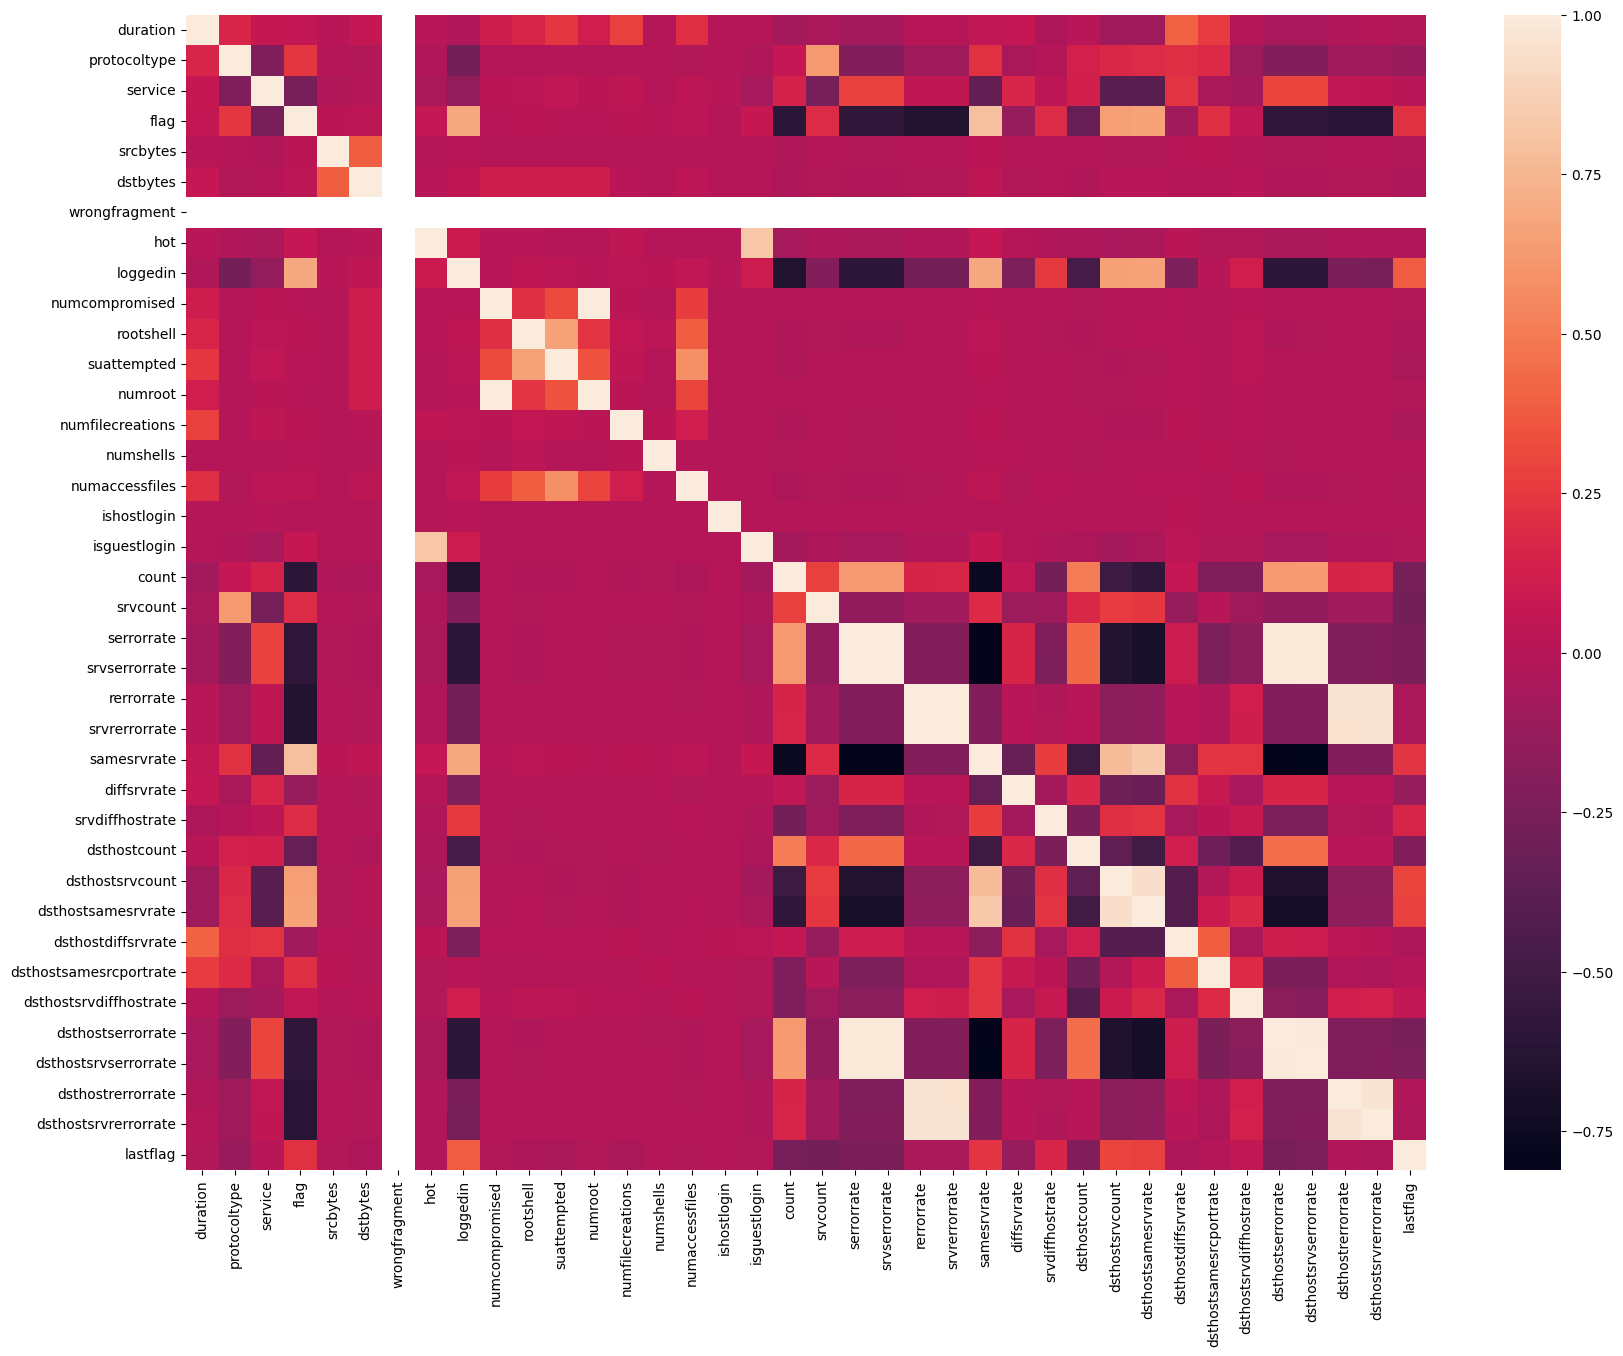

In [19]:
plt.figure(figsize=(20,15))
sns.heatmap(X.corr())

In [21]:
# X1=X.drop(['numoutboundcmds'], axis=1)

In [23]:
# plt.figure(figsize=(20,15))
# sns.heatmap(X1.corr())

In [ ]:
# sns.countplot(y)

In [25]:
scaler = StandardScaler()
scaler.fit(X)
X_transformed = scaler.transform(X)

In [ ]:
# Logistic Regression on trained dataset

In [27]:
lr = LogisticRegression()
lr.fit(X_transformed,y)
lr_pred=lr.predict(X_transformed)

In [28]:
lr_df=pd.DataFrame()
lr_df['actual']=y
lr_df['pred']=lr_pred

In [29]:
lr_df.head()

,actual,pred
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0


In [30]:
print(accuracy_score(y, lr_pred))

0.999896367090794


In [31]:
y_test_df = pd.read_csv('Sample_Submission.csv')

In [32]:
# y_test = y_test_df['attack']
y_test=le.fit_transform(y_test_df['attack'])

In [ ]:
# 
test_df = pd.read_csv('Test_Data.csv')

In [ ]:
test_df.head()

In [ ]:
test_df = test_df.drop(['land', 'urgent', 'numfailedlogins','numoutboundcmds'], axis=1)

In [ ]:
test_df.shape

In [ ]:
test_df['wrongfragment'].describe()

In [ ]:
#Applying Logistic Regression To Test Set

In [ ]:
test_df['protocoltype']=le.fit_transform(test_df['protocoltype'])
test_df['service']=le.fit_transform(test_df['service'])
test_df['flag']=le.fit_transform(test_df['flag'])

In [ ]:
X_test_transformed = scaler.transform(test_df)


In [ ]:
ytest_pred = lr.predict(X_test_transformed)

In [ ]:
print(accuracy_score(y_test, ytest_pred))

In [ ]:
# Random Forest

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_transformed,y)
rf_pred=rf.predict(X_transformed)

In [ ]:
rf_test_pred = rf.predict(test_df)

In [ ]:
print(accuracy_score(y, rf_pred))
print(accuracy_score(y_test, rf_test_pred))

In [ ]:
confusion_matrix(y_test, rf_test_pred)

In [ ]:
print(classification_report(y_test, rf_test_pred))

In [ ]:
# SVM

In [ ]:
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_transformed, y)
svm_pred=svm_model.predict(X_transformed)
svm_test_pred=svm_model.predict(test_df)

print(accuracy_score(y, svm_pred))
print(accuracy_score(y_test, svm_test_pred))
print(classification_report(y, svm_pred))
print(classification_report(y_test, svm_test_pred))

In [ ]:
# y_prob = svm_model.predict(X_test_transformed)

# fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# roc_auc = auc(fpr, tpr)

# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.show()

In [ ]:
# Neural Networks

In [ ]:
df['attack']=le.fit_transform(df['attack'])
y = df['attack']

In [ ]:
train_df = df.sample(frac=0.75, random_state=4)

In [ ]:
val_df = df.drop(train_df.index)

In [ ]:
# model = Sequential([
#     Dense(64, activation='relu', input_shape=(X_transformed.shape[1],)),
#     Dropout(0.2),
#     Dense(32, activation='relu'),
#     Dropout(0.2),
#     Dense(1, activation='sigmoid')
# ])

In [ ]:
X_transformed.shape

In [ ]:
X.shape

In [ ]:
df.shape

In [ ]:
max_val = train_df.max(axis= 0)
min_val = train_df.min(axis= 0)
 
range = max_val - min_val
train_df = (train_df - min_val)/(range)
 
val_df =  (val_df- min_val)/range

In [ ]:
X_train = train_df.drop('attack',axis=1)
X_val = val_df.drop('attack',axis=1)
y_train = train_df['attack']
y_val = val_df['attack']

input_shape = [X_train.shape[1]]
input_shape

In [ ]:

# model = tf.keras.Sequential([
# tf.keras.layers.Dense(units=1,input_shape=input_shape)])
 
# # after you create your model it's
# # always a good habit to print out it's summary
# model.summary()

In [ ]:
# model = tf.keras.Sequential([
 
#     tf.keras.layers.Dense(units=64, activation='relu',
#                           input_shape=input_shape), Dropout(0.2),
#     tf.keras.layers.Dense(units=32, activation='relu'), Dropout(0.2),
#     tf.keras.layers.Dense(units=1, activation='sigmoid')
# ])
# model.summary()

In [ ]:
# model.compile(optimizer='adam',  
               
#               # MAE error is good for
#               # numerical predictions
#               loss='binary_crossentropy', metrics=['accuracy']) 

In [ ]:
# losses = model.fit(X_train, y_train,
 
# #                    validation_data=(X_val, y_val),
                    
#                    # it will use 'batch_size' number
#                    # of examples per example
#                    batch_size=32, 
#                    epochs=20,  # total epoch
#                    validation_split=0.2
#                    )

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_transformed.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# history = model.fit(X_transformed, y, epochs=20, batch_size=32)

In [ ]:
losses = model.fit(X_transformed, y, epochs=20, batch_size=32, validation_data=(X_val, y_val))

#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
def train_using_gini(X_train, X_test, y_train):

    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion="gini",
                                      random_state=100, max_depth=20, min_samples_leaf=5)

    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini

In [ ]:
def train_using_entropy(X_train, X_test, y_train):

    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
        criterion="entropy", random_state=100,
        max_depth=3, min_samples_leaf=5)

    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy


In [ ]:
# Function to make predictions
def prediction(X_test, clf_object):
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

# Placeholder function for cal_accuracy
def cal_accuracy(y_test, y_pred):
    print("Confusion Matrix: ",
          confusion_matrix(y_test, y_pred))
    print("Accuracy : ",
          accuracy_score(y_test, y_pred)*100)
    print("Report : ",
          classification_report(y_test, y_pred))


In [ ]:
 from sklearn import tree
# Function to plot the decision tree
def plot_decision_tree(clf_object, feature_names, class_names):
    plt.figure(figsize=(15, 10))
    plot_tree(clf_object, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
    plt.show()


In [ ]:
if __name__ == "__main__":

    clf_gini = train_using_gini(X_train, X_test_transformed, y_train)
    clf_entropy = train_using_entropy(X_train, X_test_transformed, y_train)

    # Visualizing the Decision Trees
#     plot_decision_tree(clf_gini)
#     plot_decision_tree(clf_entropy)


In [ ]:
# Operational Phase
print("Results Using Gini Index:")
y_pred_gini = prediction(X_test_transformed, clf_gini)
cal_accuracy(y_test, y_pred_gini)

In [ ]:
print("Results Using Entropy:")
y_pred_entropy = prediction(X_test_transformed, clf_entropy)
cal_accuracy(y_test, y_pred_entropy)


In [ ]:
y_pred_gini

In [ ]:
# predicted_data_01 = scaler.inverse_transform(y_pred_gini)

In [ ]:
y_pred_gini = pd.DataFrame(y_pred_gini,columns=['attack'])
y_pred_gini

In [ ]:
y_pred_gini.to_csv(f"NAD_ShreyaB.csv", index=False)

## Using KNN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df

In [ ]:
a=[]
K=range(1,39)
for i in K:
    kmean=KMeans(n_clusters=i)
    kmean.fit(df)
    a.append(kmean.inertia_)
    
plt.plot(K,a,marker='o')
plt.title('Elbow Method',fontsize=15)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('Sum of Squared distance',fontsize=15)
plt.show()